In [ ]:
!pip install torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
from torchvision.transforms import ToPILImage


In [ ]:
# Choose device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the same device as image_tensor
model.model.to(device)

# Load and preprocess image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # YOLO expects RGB

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((640, 640)),
    transforms.ToTensor(),
])

image_tensor = transform(image_rgb).unsqueeze(0).to(device)  # Move to device


In [ ]:
# Step 1: Clone the Segment Anything repo (if not already)
!git clone https://github.com/facebookresearch/segment-anything.git
%cd segment-anything

# Step 2: Install the package
!pip install -e .

# Step 3: Import libraries
import torch
import numpy as np
import cv2
from segment_anything import sam_model_registry, SamPredictor

# Step 4: Download the checkpoint (only needs to be done once)
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

# Step 5: Load the model
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth")
sam.to("cpu")  # or "cuda" if you're using GPU

# Step 6: Initialize the predictor
predictor = SamPredictor(sam)


Cloning into 'segment-anything'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 304 (delta 2), reused 1 (delta 1), pack-reused 299 (from 2)
Receiving objects: 100% (304/304), 18.31 MiB | 6.76 MiB/s, done.
Resolving deltas: 100% (159/159), done.
/content/segment-anything
Obtaining file:///content/segment-anything
  Preparing metadata (setup.py) ... done
  Running setup.py develop for segment_anything
--2025-05-03 07:29:16--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.238.113, 13.35.238.84, 13.35.238.103, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.238.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   134MB/s    i

fatal: destination path 'segment-anything' already exists and is not an empty directory.
/content/segment-anything
Obtaining file:///content/segment-anything
  Preparing metadata (setup.py) ... done
  Attempting uninstall: segment_anything
    Found existing installation: segment_anything 1.0
    Uninstalling segment_anything-1.0:
      Successfully uninstalled segment_anything-1.0
  Running setup.py develop for segment_anything
--2025-05-03 07:35:42--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.165.102.101, 3.165.102.15, 3.165.102.66, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.165.102.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth.1’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  61.9MB/s    in 16s     

2025-05-03 07:35:58 (154 MB/s) - ‘sam_vit_h_4b8939.pth.1’

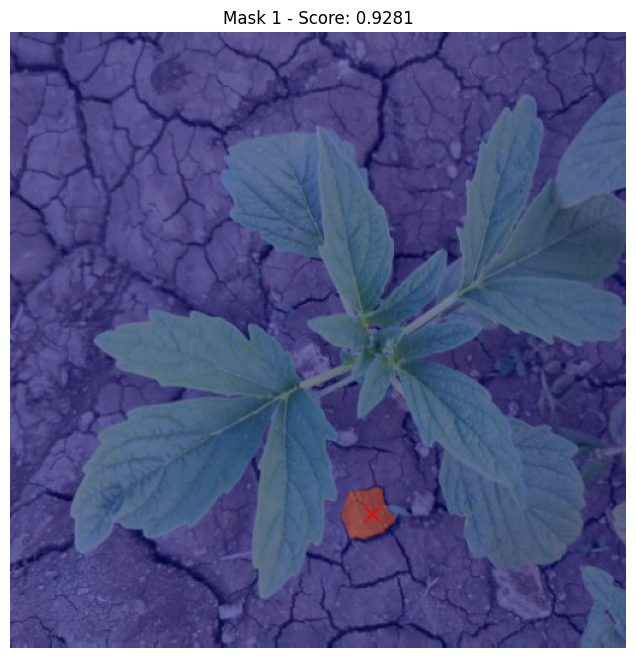

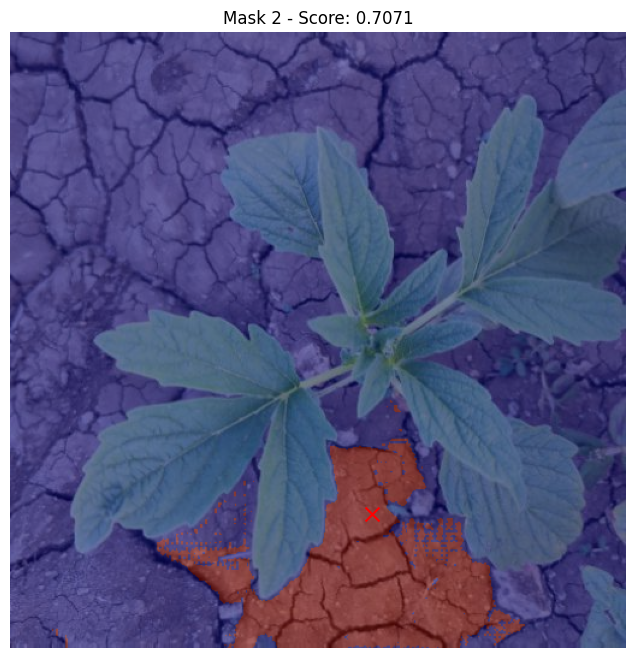

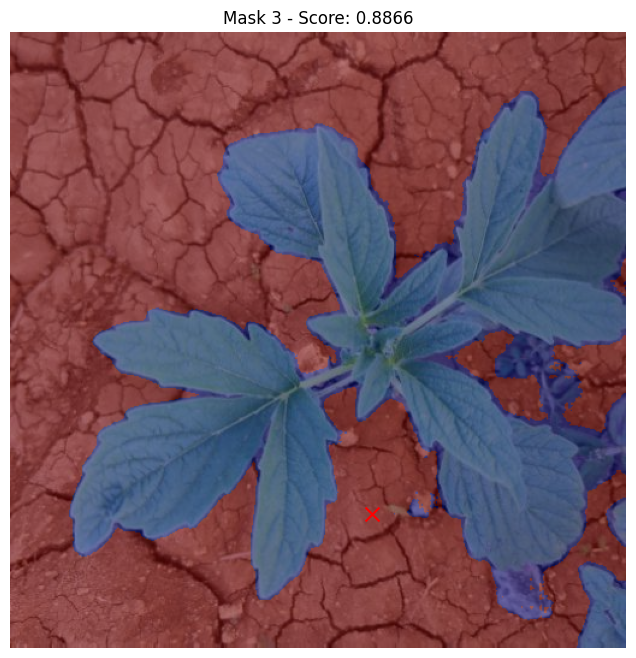

In [ ]:
# Step 1: Clone the Segment Anything repo (if not already)
!git clone https://github.com/facebookresearch/segment-anything.git
%cd segment-anything

# Step 2: Install the package
!pip install -e .

# Step 3: Import libraries
import torch
import numpy as np
import cv2
from segment_anything import sam_model_registry, SamPredictor

# Step 4: Download the checkpoint (only needs to be done once)
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

# Step 5: Load the model
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth")
sam.to("cpu")  # or "cuda" if you're using GPU

# Step 6: Initialize the predictor
predictor = SamPredictor(sam)

# --- The code below was moved from cell 2 ---

import matplotlib.pyplot as plt
import cv2 # Import cv2

# Load and set the image (if not already done)
image = cv2.imread("/content/datasets/Train/images/agri_0_114.jpeg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)

# Perform prediction (already done by you)
input_point = np.array([[300, 400]])
input_label = np.array([1])
masks, scores, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True
)

# Visualize all masks (SAM returns 3 by default when multimask_output=True)
for i, mask in enumerate(masks):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5, cmap='jet')  # Semi-transparent mask overlay
    plt.scatter(input_point[:, 0], input_point[:, 1], color='red', s=100, marker='x')  # Visualize prompt point
    plt.title(f"Mask {i+1} - Score: {scores[i]:.4f}")
    plt.axis('off')
    plt.show()

fatal: destination path 'segment-anything' already exists and is not an empty directory.
/content/segment-anything
Obtaining file:///content/segment-anything
  Preparing metadata (setup.py) ... done
  Attempting uninstall: segment_anything
    Found existing installation: segment_anything 1.0
    Uninstalling segment_anything-1.0:
      Successfully uninstalled segment_anything-1.0
  Running setup.py develop for segment_anything
--2025-05-03 07:35:42--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.165.102.101, 3.165.102.15, 3.165.102.66, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|3.165.102.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth.1’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  61.9MB/s    in 16s     

2025-05-03 07:35:58 (154 MB/s) - ‘sam_vit_h_4b8939.pth.1’

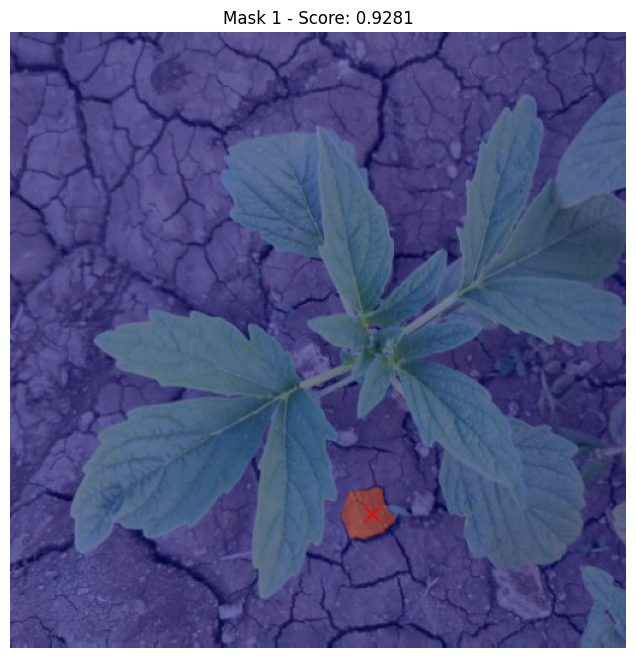

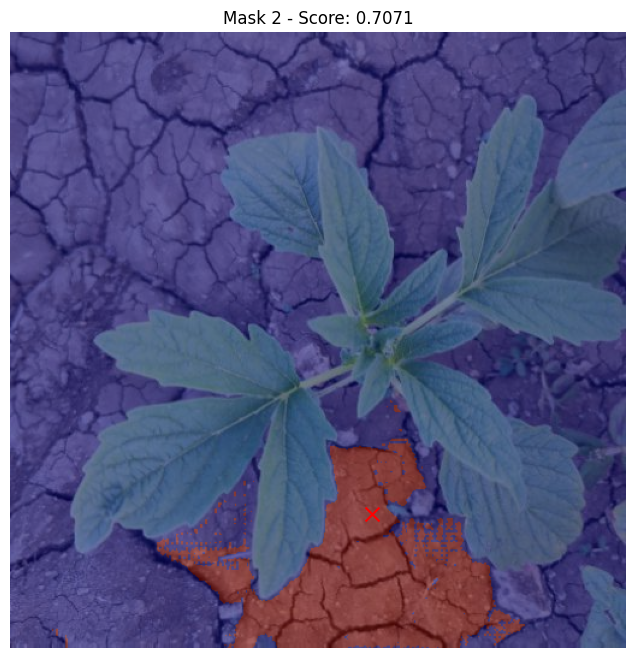

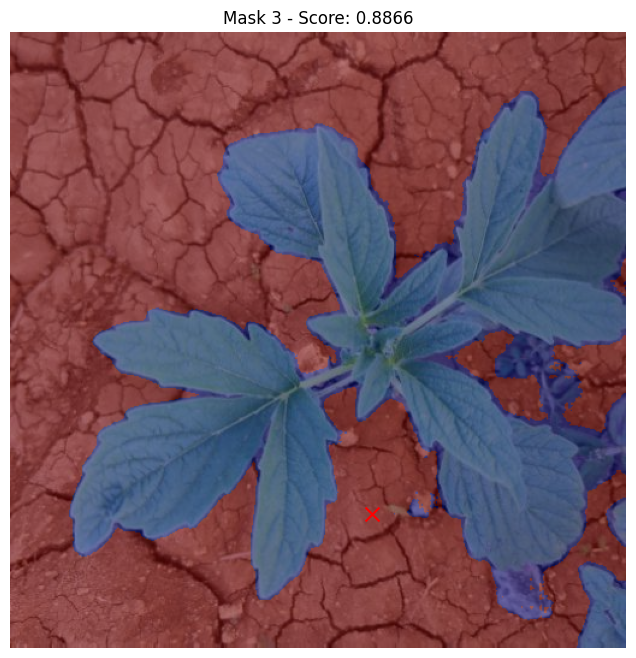

In [ ]:
# Step 1: Clone the Segment Anything repo (if not already)
!git clone https://github.com/facebookresearch/segment-anything.git
%cd segment-anything

# Step 2: Install the package
!pip install -e .

# Step 3: Import libraries
import torch
import numpy as np
import cv2
from segment_anything import sam_model_registry, SamPredictor

# Step 4: Download the checkpoint (only needs to be done once)
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

# Step 5: Load the model
sam = sam_model_registry["vit_h"](checkpoint="sam_vit_h_4b8939.pth")
sam.to("cpu")  # or "cuda" if you're using GPU

# Step 6: Initialize the predictor
predictor = SamPredictor(sam)

# --- The code below was moved from cell 2 ---

import matplotlib.pyplot as plt
import cv2 # Import cv2

# Load and set the image (if not already done)
image = cv2.imread("/content/Augmentedtrainn/images/agri_0_136_aug0.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
predictor.set_image(image)

# Perform prediction (already done by you)
input_point = np.array([[300, 400]])
input_label = np.array([1])
masks, scores, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True
)

# Visualize all masks (SAM returns 3 by default when multimask_output=True)
for i, mask in enumerate(masks):
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.imshow(mask, alpha=0.5, cmap='jet')  # Semi-transparent mask overlay
    plt.scatter(input_point[:, 0], input_point[:, 1], color='red', s=100, marker='x')  # Visualize prompt point
    plt.title(f"Mask {i+1} - Score: {scores[i]:.4f}")
    plt.axis('off')
    plt.show()


0: 640x640 2 crops, 9.5ms
Speed: 13.2ms preprocess, 9.5ms inference, 410.8ms postprocess per image at shape (1, 3, 640, 640)


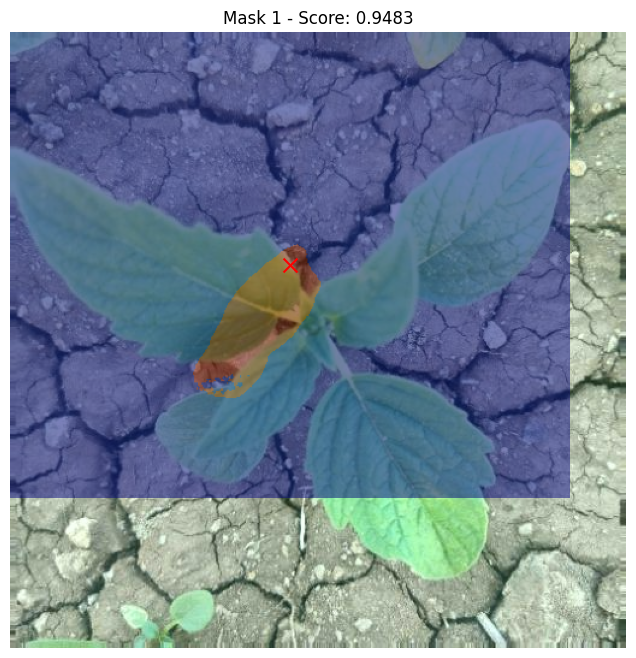

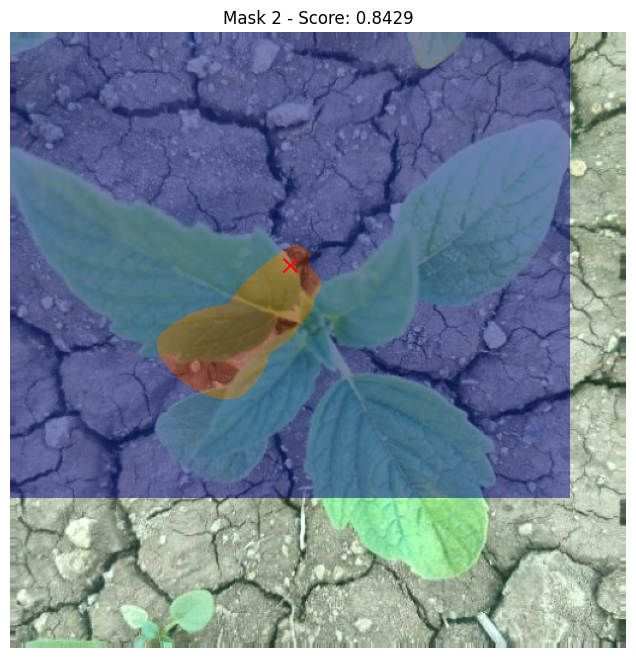

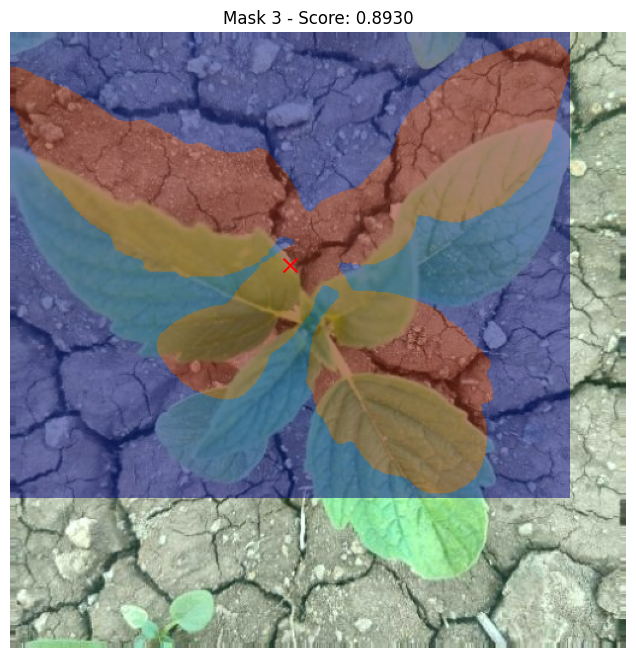

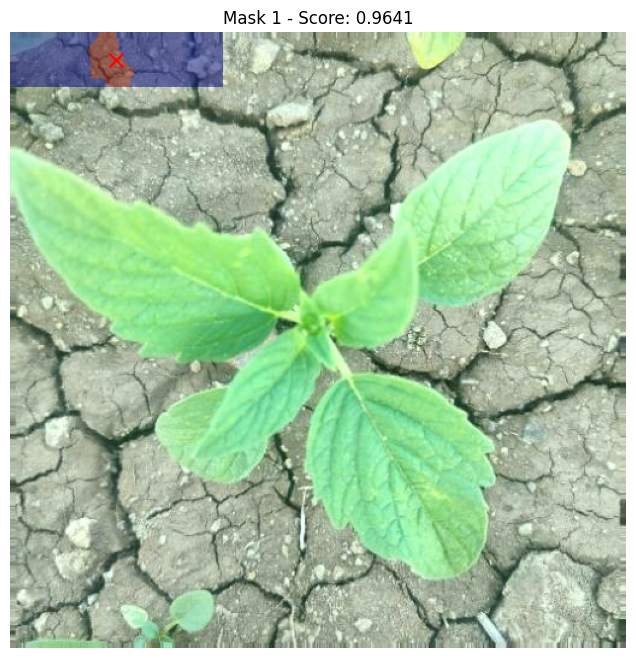

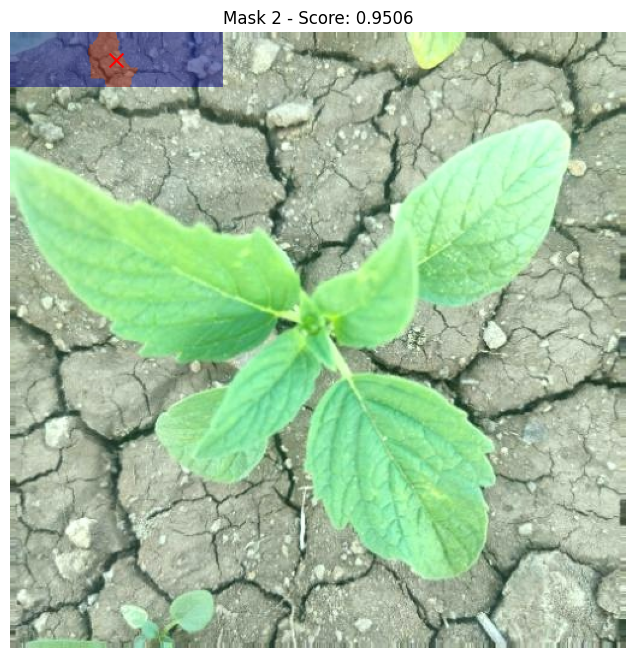

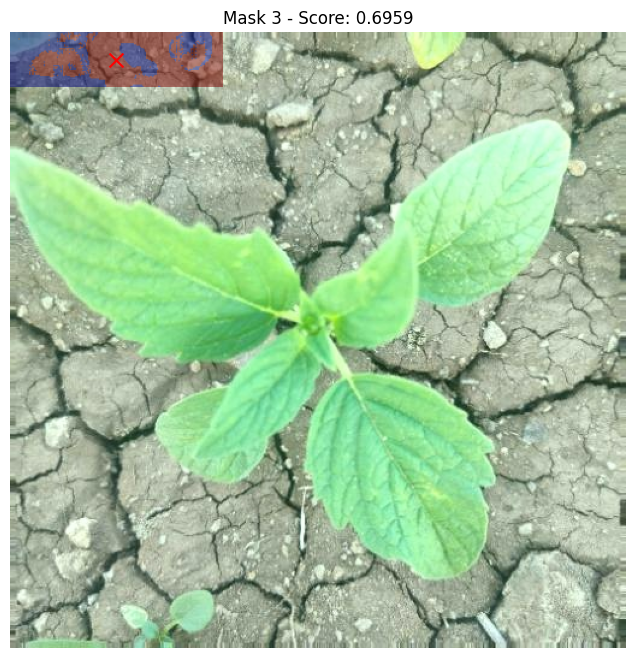

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO  # Import YOLO from ultralytics  # Assuming YOLOv8 is being used

# Load the YOLOv8 model (make sure you provide the correct weights path)
model = YOLO("/content/runs/detect/train2/weights/best.pt")  # Replace with your YOLOv8 weights path

# Load and set the image (ensure path is correct)
image = cv2.imread("/content/Augmentedtrainn/images/agri_0_136_aug0.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform detection to get bounding boxes and labels
# The change is here: Call the model with a list containing the image path
results = model([image])  # Pass image as a list

# Now, results[0] will contain the Results object for the image
boxes = results[0].boxes  # Shape: (num_objects, 4) -> [x1, y1, x2, y2]
# Access the labels from the boxes object:
labels = results[0].boxes.cls  # Corresponding labels for the objects


# Use the SAM predictor
from segment_anything import sam_model_registry, SamPredictor  # Make sure SAM is installed and configured

# Load SAM model -  Use sam_model_registry to load the model
sam = sam_model_registry["vit_h"](checkpoint="/content/segment-anything/sam_vit_h_4b8939.pth")
sam_model = SamPredictor(sam) # Initialize the predictor with the loaded model


# For each detected object, apply SAM to create masks
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box.xyxy[0].tolist() # extract coordinates from box object
    object_image = image_rgb[int(y1):int(y2), int(x1):int(x2)]  # Crop the detected object

    # Set image for SAM predictor
    sam_model.set_image(object_image)

    # Use the bounding box as a point for SAM (you can modify to use multiple points if needed)
    input_point = np.array([[object_image.shape[1] // 2, object_image.shape[0] // 2]])  # Center of the object
    input_label = np.array([1])  # Label for the object (usually '1' for foreground)

    # Perform prediction
    masks, scores, _ = sam_model.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True
    )

    # Visualize all masks for the current object
    for j, mask in enumerate(masks):
        plt.figure(figsize=(8, 8))
        plt.imshow(image_rgb)
        plt.imshow(mask, alpha=0.5, cmap='jet')  # Semi-transparent mask overlay
        plt.scatter(input_point[:, 0], input_point[:, 1], color='red', s=100, marker='x')  # Visualize prompt point
        plt.title(f"Mask {j+1} - Score: {scores[j]:.4f}")
        plt.axis('off')
        plt.show()

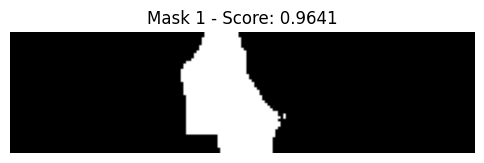

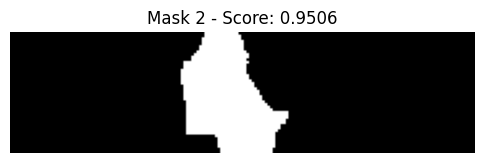

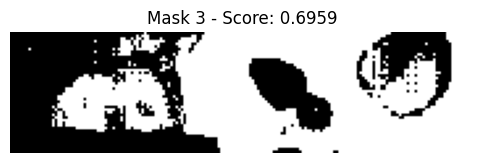

In [ ]:
# Loop through each mask and visualize it separately
for i, mask in enumerate(masks):
    plt.figure(figsize=(6, 6))
    plt.imshow(mask, cmap='gray')  # Show binary mask only
    plt.title(f"Mask {i+1} - Score: {scores[i]:.4f}")
    plt.axis('off')
    plt.show()


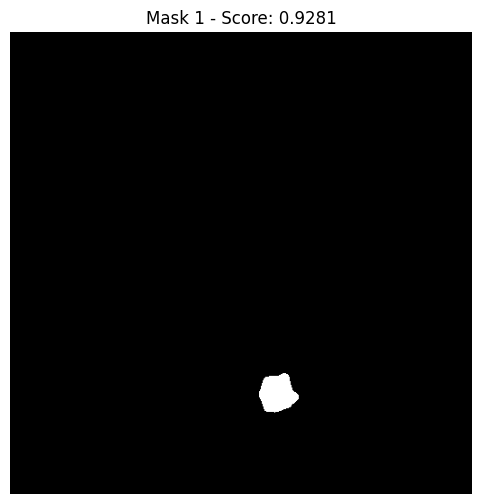

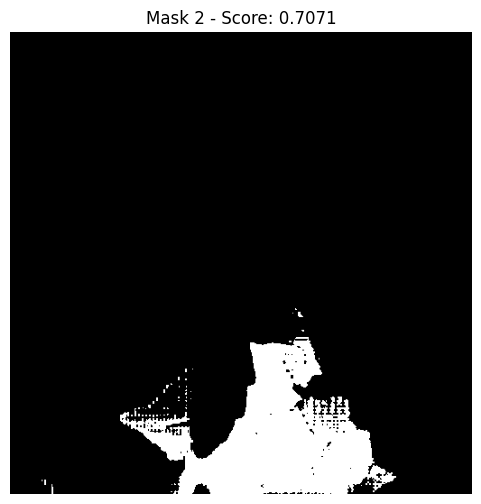

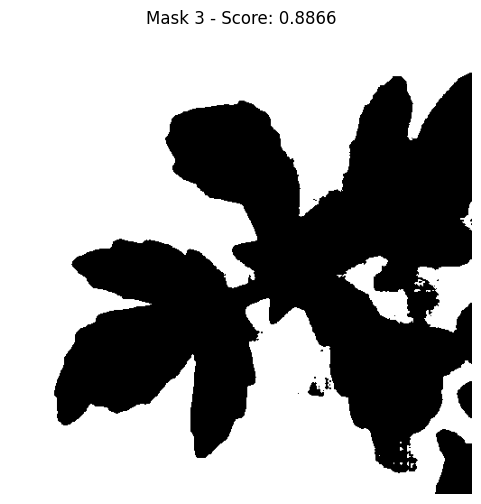

In [ ]:
# Loop through each mask and visualize it separately
for i, mask in enumerate(masks):
    plt.figure(figsize=(6, 6))
    plt.imshow(mask, cmap='gray')  # Show binary mask only
    plt.title(f"Mask {i+1} - Score: {scores[i]:.4f}")
    plt.axis('off')
    plt.show()


In [ ]:
from ultralytics import YOLO
model = YOLO('/content/runs/detect/train2/weights/best.pt')
